In [2]:
import numpy as np
import pandas as pd
from scipy import linalg as la
from matplotlib import pyplot as plt

1\. **PCA on 3D dataset**

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

Covariance matrix:
 [[ 1.05337069  0.98629978  3.09304116]
 [ 0.98629978 10.06924774 12.04184731]
 [ 3.09304116 12.04184731 18.22792962]] 

Eigenvalues:
 [2.72275841e+01 5.06869207e-16 2.12296393e+00] 

Eigenvectors:
 [[-0.11734996 -0.81649658  0.56529843]
 [-0.5749964  -0.40824829 -0.70902219]
 [-0.80969632  0.40824829  0.42157468]] 

Eigenvalue: 27.227584123232866 ,	eigenvector: [-0.11734996 -0.5749964  -0.80969632]
Eigenvalue: 5.068692069927894e-16 ,	eigenvector: [-0.81649658 -0.40824829  0.40824829]
Eigenvalue: 2.122963927844735 ,	eigenvector: [ 0.56529843 -0.70902219  0.42157468]
Eigenvalue: 27.227584123232866 ,	eigenvector: [-0.11734996 -0.5749964  -0.80969632]
Eigenvalue: 5.068692069927894e-16 ,	eigenvector: [-0.81649658 -0.40824829  0.40824829]
Eigenvalue: 2.122963927844735 ,	eigenvector: [ 0.56529843 -0.70902219  0.42157468]
Eigenvalue: 27.227584123232866 ,	eigenvector: [-0.11734996 -0.5749964  -0.80969632]
Eigenvalue: 5.068692069927894e-16 ,	eigenvector: [-0.81649658 -0.40824

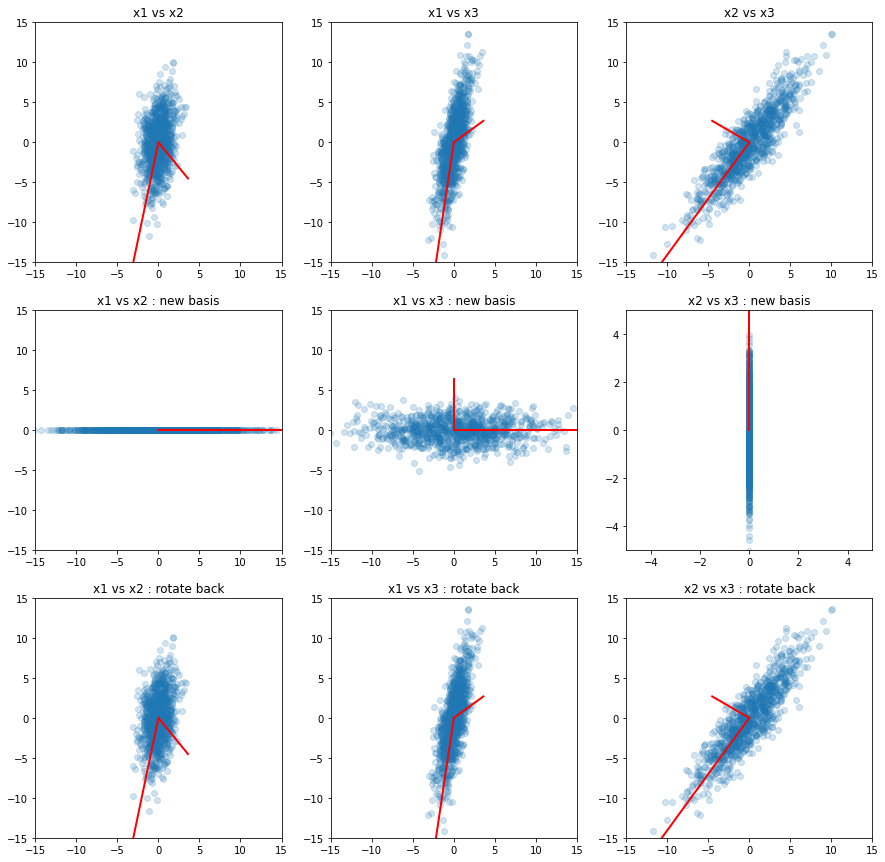

In [23]:
n = 1000
x1 = np.random.normal(loc=0,scale=1,size=n)
x2 = x1 + np.random.normal(loc=0,scale=3,size=n)
x3 = 2*x1 + x2
X = np.array([x1,x2,x3])

fig, ax= plt.subplots(3, 3,figsize=(15, 15))
ax[0,0].scatter(X[0,:],X[1,:],alpha=0.2)
ax[0,0].set_title('x1 vs x2')
ax[0,1].scatter(X[0,:],X[2,:],alpha=0.2)
ax[0,1].set_title('x1 vs x3')
ax[0,2].scatter(X[1,:],X[2,:],alpha=0.2)
ax[0,2].set_title('x2 vs x3')

# covariance matrix
cov = np.cov(X)
print("Covariance matrix:\n", cov, '\n')

# now find the eigenvectors of the covariance matrix
l, V = la.eig(cov)
# take only the real component
l = np.real_if_close(l)

print("Eigenvalues:\n", l, '\n')
print("Eigenvectors:\n", V, '\n')

# a scale factor to graphically enhance the lines - only for visualization purposes
scale_factor = 3

# draw each eigenvectors rescaled by the eigenvalues
for li, vi in zip(l, V.T):
    print("Eigenvalue:", li, ",\teigenvector:", vi)
    # the line is defined by specifying its beginning and its end 
    ax[0,0].plot([0, scale_factor * li * vi[0]], [0, scale_factor * li * vi[1]], 'r-', lw=2)
    ax[0,0].axis([-15, 15, -15, 15])
for li, vi in zip(l, V.T):
    print("Eigenvalue:", li, ",\teigenvector:", vi)
    # the line is defined by specifying its beginning and its end 
    ax[0,1].plot([0, scale_factor * li * vi[0]], [0, scale_factor * li * vi[2]], 'r-', lw=2)
    ax[0,1].axis([-15, 15, -15, 15])
for li, vi in zip(l, V.T):
    print("Eigenvalue:", li, ",\teigenvector:", vi)
    # the line is defined by specifying its beginning and its end 
    ax[0,2].plot([0, scale_factor * li * vi[1]], [0, scale_factor * li * vi[2]], 'r-', lw=2)
    ax[0,2].axis([-15, 15, -15, 15])

# rotate all the data points accordingly to the new base by multiplying by the transpose of matrix V
Xp = np.dot(V.T, X)

ax[1,0].scatter(Xp[0,:], Xp[1,:], alpha=0.2)
ax[1,1].scatter(Xp[0,:], Xp[2,:], alpha=0.2)
ax[1,2].scatter(Xp[1,:], Xp[2,:], alpha=0.2)

for li, vi in zip(l, np.dot(V.T, V)):
    ax[1,0].plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], 'r-', lw=2)
    ax[1,0].axis([-15, 15, -15, 15])
    ax[1,0].set_title('x1 vs x2 : new basis')
for li, vi in zip(l, np.dot(V.T, V)):
    ax[1,1].plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[2]], 'r-', lw=2)
    ax[1,1].axis([-15, 15, -15, 15])
    ax[1,1].set_title('x1 vs x3 : new basis')
for li, vi in zip(l, np.dot(V.T, V)):
    ax[1,2].plot([0, scale_factor*li*vi[1]], [0, scale_factor*li*vi[2]], 'r-', lw=2)
    ax[1,2].axis([-5, 5, -5, 5])
    ax[1,2].set_title('x2 vs x3 : new basis')
    
# rotate back the data to the original basis, this time by multiplying by the matrix V, the opposite as before
Xpp = np.dot(V, Xp)

# re-plot in the original basis
ax[2,0].scatter(Xpp[0,:], Xpp[1,:], alpha=0.2)
for li, vi in zip(l, V.T):
    ax[2,0].plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], 'r-', lw=2)
    ax[2,0].axis([-15, 15, -15, 15])
    ax[2,0].set_title('x1 vs x2 : rotate back')
ax[2,1].scatter(Xpp[0,:], Xpp[2,:], alpha=0.2)
for li, vi in zip(l, V.T):
    ax[2,1].plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[2]], 'r-', lw=2)
    ax[2,1].axis([-15, 15, -15, 15])
    ax[2,1].set_title('x1 vs x3 : rotate back')
ax[2,2].scatter(Xpp[1,:], Xpp[2,:], alpha=0.2)
for li, vi in zip(l, V.T):
    ax[2,2].plot([0, scale_factor*li*vi[1]], [0, scale_factor*li*vi[2]], 'r-', lw=2)
    ax[2,2].axis([-15, 15, -15, 15])
    ax[2,2].set_title('x2 vs x3 : rotate back')
    
#l, V = np.linalg.eig(cov)
Lambda = np.diag(l)
print("Lambda:\n", Lambda, '\n')
print("Trace(A):\n", cov.trace(), '\n')
print("Trace(Lambda):\n", Lambda.trace(), '\n')

print("By selecting the component 0, we retain %.2f%% of the total variability" % (Lambda[0, 0]/Lambda.trace()))

# Perform SVD decomposition on the dataset
U, S, Vt = np.linalg.svd(X)

# Rescale the SVD spectrum to get the eigenvalues
l_svd = S**2/(n-1)
l_svd = l_svd[[0,2,1]]
# The matrix U already contains the eigenvectors
V_svd = U
V_svd = V_svd[:,[0,2,1]]

# Compare Eigenvalues
print("Eigendecomposition:\n", l)
print("SVD:\n", l_svd)

# Compare Eigenvectors
print("Eigendecomposition:\n", V)
print("SVD:\n", V_svd)

print("By selecting the component 0 and 2, we retain %.2f%% of the total variability" % ((Lambda[0, 0]+Lambda[2,2])/Lambda.trace()))


2\. **PCA on a nD dataset**

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

Covariance matrix:
 [[ 1.06437450e+00  1.07916988e+00  3.20791888e+00  1.36067608e-03
   1.59123288e-04 -7.71773254e-04 -7.14343827e-04  1.57927378e-03
  -4.04942274e-04 -5.63801416e-04  9.19177934e-04 -1.23123979e-03
   1.51612776e-05]
 [ 1.07916988e+00  9.71287484e+00  1.18712146e+01  5.45097398e-04
  -1.24560489e-03 -3.19658143e-03 -3.38078133e-03  2.28623534e-03
  -3.72560233e-03  2.47967457e-03  7.97590512e-04 -6.26721833e-03
   4.59177707e-03]
 [ 3.20791888e+00  1.18712146e+01  1.82870523e+01  3.26644956e-03
  -9.27358317e-04 -4.74012794e-03 -4.80946898e-03  5.44478290e-03
  -4.53548687e-03  1.35207173e-03  2.63594638e-03 -8.72969791e-03
   4.62209963e-03]
 [ 1.36067608e-03  5.45097398e-04  3.26644956e-03  2.40335562e-03
  -2.86140418e-05 -7.08519405e-05 -5.02655908e-05  1.64459142e-04
  -6.12959633e-06 -1.26739398e-05  6.49842894e-06 -3.30837371e-05
   1.77426173e-05]
 [ 1.59123288e-04 -1.24560489e-03 -9.27358317e-04 -2.86140418e-05
   1.23227405e-03  2.73197857e-05 -8.21458100e

Lambda:
 [[ 2.70278514e+01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00  2.03646767e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -2.45565082e-16  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  2.45224936e-03
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   2.24244935e-03  0.00000000e+00  0.00000000e+00  0.0000

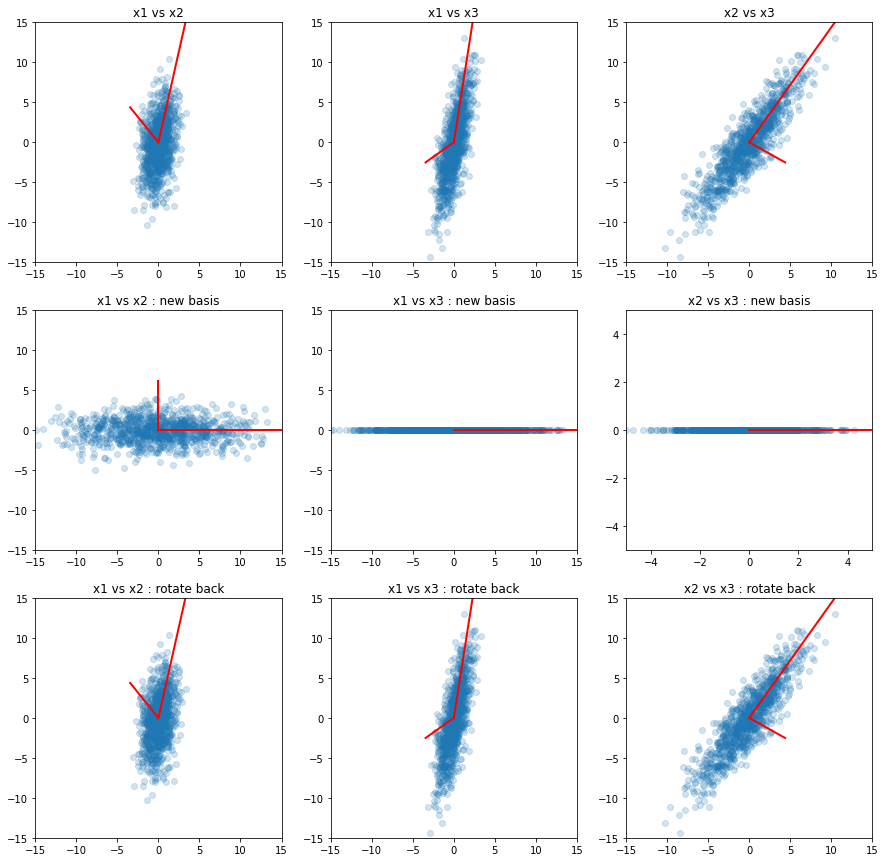

In [24]:
# Creating the nD dataset with other 10 uncorrelated variables
n = 1000
x1 = np.random.normal(loc=0,scale=1,size=n)
x2 = x1 + np.random.normal(loc=0,scale=3,size=n)
x3 = 2*x1 + x2
n1 = np.random.normal(0,1/np.random.randint(low=20, high=30),n)
n2 = np.random.normal(0,1/np.random.randint(low=20, high=30),n)
n3 = np.random.normal(0,1/np.random.randint(low=20, high=30),n)
n4 = np.random.normal(0,1/np.random.randint(low=20, high=30),n)
n5 = np.random.normal(0,1/np.random.randint(low=20, high=30),n)
n6 = np.random.normal(0,1/np.random.randint(low=20, high=30),n)
n7 = np.random.normal(0,1/np.random.randint(low=20, high=30),n)
n8 = np.random.normal(0,1/np.random.randint(low=20, high=30),n)
n9 = np.random.normal(0,1/np.random.randint(low=20, high=30),n)
n10 = np.random.normal(0,1/np.random.randint(low=20, high=30),n)
X = np.array([x1,x2,x3,n1,n2,n3,n4,n5,n6,n7,n8,n9,n10])

fig, ax= plt.subplots(3, 3,figsize=(15, 15))
ax[0,0].scatter(X[0,:],X[1,:],alpha=0.2)
ax[0,0].set_title('x1 vs x2')
ax[0,1].scatter(X[0,:],X[2,:],alpha=0.2)
ax[0,1].set_title('x1 vs x3')
ax[0,2].scatter(X[1,:],X[2,:],alpha=0.2)
ax[0,2].set_title('x2 vs x3')

# the covariance matrix
cov = np.cov(X)
print("Covariance matrix:\n", cov, '\n')

# now find the eigenvectors of the covariance matrix
l, V = la.eig(cov)
# take only the real component, if possible
l = np.real_if_close(l)

print("Eigenvalues:\n", l, '\n')
print("Eigenvectors:\n", V, '\n')


# a scale factor to graphically enhance the lines - only for visualization purposes
scale_factor = 3

# draw each eigenvectors rescaled by the eigenvalues
for li, vi in zip(l, V.T):
    print("Eigenvalue:", li, ",\teigenvector:", vi)
    ax[0,0].plot([0, scale_factor * li * vi[0]], [0, scale_factor * li * vi[1]], 'r-', lw=2)
    ax[0,0].axis([-15, 15, -15, 15])
for li, vi in zip(l, V.T):
    print("Eigenvalue:", li, ",\teigenvector:", vi)
    ax[0,1].plot([0, scale_factor * li * vi[0]], [0, scale_factor * li * vi[2]], 'r-', lw=2)
    ax[0,1].axis([-15, 15, -15, 15])
for li, vi in zip(l, V.T):
    print("Eigenvalue:", li, ",\teigenvector:", vi) 
    ax[0,2].plot([0, scale_factor * li * vi[1]], [0, scale_factor * li * vi[2]], 'r-', lw=2)
    ax[0,2].axis([-15, 15, -15, 15])

# rotate all the data points accordingly to the new base by multiplying by the transpose of matrix V
Xp = np.dot(V.T, X)

ax[1,0].scatter(Xp[0,:], Xp[1,:], alpha=0.2)
ax[1,1].scatter(Xp[0,:], Xp[2,:], alpha=0.2)
ax[1,2].scatter(Xp[1,:], Xp[2,:], alpha=0.2)

for li, vi in zip(l, np.dot(V.T, V)): 
    ax[1,0].plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], 'r-', lw=2)
    ax[1,0].axis([-15, 15, -15, 15])
    ax[1,0].set_title('x1 vs x2 : new basis')
for li, vi in zip(l, np.dot(V.T, V)):
    ax[1,1].plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[2]], 'r-', lw=2)
    ax[1,1].axis([-15, 15, -15, 15])
    ax[1,1].set_title('x1 vs x3 : new basis')
for li, vi in zip(l, np.dot(V.T, V)):
    ax[1,2].plot([0, scale_factor*li*vi[1]], [0, scale_factor*li*vi[2]], 'r-', lw=2)
    ax[1,2].axis([-5, 5, -5, 5])
    ax[1,2].set_title('x2 vs x3 : new basis')
    
# rotate back the data to the original basis, this time by multiplying by the matrix V, the opposite as before
Xpp = np.dot(V, Xp)

# re-plot in the original basis
ax[2,0].scatter(Xpp[0,:], Xpp[1,:], alpha=0.2)
for li, vi in zip(l, V.T):
    ax[2,0].plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], 'r-', lw=2)
    ax[2,0].axis([-15, 15, -15, 15])
    ax[2,0].set_title('x1 vs x2 : rotate back')
ax[2,1].scatter(Xpp[0,:], Xpp[2,:], alpha=0.2)
for li, vi in zip(l, V.T):
    ax[2,1].plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[2]], 'r-', lw=2)
    ax[2,1].axis([-15, 15, -15, 15])
    ax[2,1].set_title('x1 vs x3 : rotate back')
ax[2,2].scatter(Xpp[1,:], Xpp[2,:], alpha=0.2)
for li, vi in zip(l, V.T):
    ax[2,2].plot([0, scale_factor*li*vi[1]], [0, scale_factor*li*vi[2]], 'r-', lw=2)
    ax[2,2].axis([-15, 15, -15, 15])
    ax[2,2].set_title('x2 vs x3 : rotate back')
    
#l, V = np.linalg.eig(cov)
Lambda = np.diag(l)
print("Lambda:\n", Lambda, '\n')
print("Trace(A):\n", cov.trace(), '\n')
print("Trace(Lambda):\n", Lambda.trace(), '\n')

print("By selecting the component 0, we retain %.2f%% of the total variability" % (Lambda[0, 0]/Lambda.trace()))

# Perform SVD decomposition on the dataset
U, S, Vt = np.linalg.svd(X)

# Rescale the SVD spectrum to get the eigenvalues
l_svd = S**2/(n-1)
l_svd = l_svd[[0,2,1]]
# The matrix U already contains the eigenvectors
V_svd = U
V_svd = V_svd[:,[0,2,1]]

# Compare Eigenvalues
print("Eigendecomposition:\n", l)
print("SVD:\n", l_svd)

# Compare Eigenvectors
print("Eigendecomposition:\n", V)
print("SVD:\n", V_svd)

print("By selecting the component 0 and 1, we retain %.2f%% of the total variability" % ((Lambda[0, 0]+Lambda[1,1])/Lambda.trace()))

3\. **Optional**: **PCA on the MAGIC dataset**

Perform a PCA on the magic04.data dataset.

In [144]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 

--2022-12-05 17:23:17--  https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5400 (5,3K) [application/x-httpd-php]
Saving to: 'data/magic04.names.1'

     0K .....                                                 100%  291K=0,02s

2022-12-05 17:23:18 (291 KB/s) - 'data/magic04.names.1' saved [5400/5400]



In [22]:
df = pd.read_csv('data/magic04.data')
print('Dataframe Shape: ',df.shape,'\n')
n = 1000
dfv = df.iloc[0:n, 0:10]
display(dfv)

cov = np.cov(dfv)
l, V = la.eig(cov)
l = np.real(l)
print('l', np.shape(l))


Lambda = np.diag(l)
print('Lambda: \n',Lambda,'\n')
print("Trace(A):\n", cov.trace(), '\n')
print("Trace(Lambda):\n", np.real_if_close(Lambda.trace()), '\n')
print("Lambda[0,0]:\n", np.real_if_close(Lambda[0,0]), '\n')
print("By selecting the component 0, we retain %.2f%% of the total variability" % (Lambda[0, 0]/Lambda.trace()))
print("By selecting the component 0,1,2 and 3, we retain %.2f%% of the total variability" % ((Lambda[0, 0]+Lambda[1,1]+Lambda[2,2]+Lambda[3,3])/Lambda.trace()))

Dataframe Shape:  (19020, 11) 



,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620
...,...,...,...,...,...,...,...,...,...,...
995,20.0489,9.2926,2.4014,0.6429,0.4226,4.1464,-14.5626,10.2506,25.8830,187.8470
996,13.3396,10.5628,2.1917,0.7910,0.4019,-14.8910,-2.3901,11.9001,10.7959,182.9100
997,49.8521,11.4525,2.3971,0.4529,0.2305,52.6071,39.3622,-8.6905,6.0457,183.4950
998,29.2688,14.2779,2.5723,0.4016,0.2021,-21.2132,-23.9344,-8.2073,47.5590,102.7790


l (1000,)
Lambda: 
 [[ 3.87771259e+06  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.48993128e+05  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.17409198e+05 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -2.88782817e-13
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
  -6.05432469e-14  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00 -6.05432469e-14]] 

Trace(A):
 4238890.156335214 

Trace(Lambda):
 4238890.156335211 

Lambda[0,0]:
 3877712.586408988 

By selecting the component 0, we retain 0.91% of the total variability
By selecting the component 0,1,2 and 3, we retain 0.99% of the total variability
